In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
%matplotlib inline

In [4]:
df = pd.read_csv('Project/data_files/san_francisco/airbnb_union.csv')

#Setting datetime type
df['date_collected'] = df['date_collected'].astype('datetime64[ns]')
#Creating year column
df ['year'] = df['date_collected'].dt.year

In [5]:
df.describe()

,room_id,host_id,borough,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,year
count,2.055320e+05,2.055260e+05,0.0,205483.000000,159178.000000,197111.000000,194842.000000,205532.000000,134055.000000,205532.000000,205532.000000,205532.000000
mean,7.020337e+06,1.820178e+07,NaN,21.064959,3.959432,3.082111,1.346198,252.027290,3.528656,37.768150,-122.430243,2016.040636
std,4.841478e+06,2.250471e+07,NaN,39.716682,1.807185,1.931360,0.897208,437.442457,9.051024,0.021394,0.025123,0.791602
min,9.580000e+02,4.600000e+01,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,37.708278,-122.513065,2013.000000
25%,2.433743e+06,2.597104e+06,NaN,1.000000,4.500000,2.000000,1.000000,108.000000,1.000000,37.754118,-122.441740,2016.000000
50%,6.988943e+06,8.539143e+06,NaN,5.000000,5.000000,2.000000,1.000000,167.000000,2.000000,37.770237,-122.425592,2016.000000
75%,1.077237e+07,2.580596e+07,NaN,22.000000,5.000000,4.000000,2.000000,256.000000,3.000000,37.785236,-122.412920,2017.000000
max,1.978199e+07,1.395538e+08,NaN,513.000000,5.000000,18.000000,10.000000,30000.000000,1000.000000,37.831093,-122.363243,2017.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205532 entries, 0 to 205531
Data columns (total 16 columns):
room_id                 205532 non-null int64
host_id                 205526 non-null float64
room_type               205489 non-null object
borough                 0 non-null float64
neighborhood            205532 non-null object
reviews                 205483 non-null float64
overall_satisfaction    159178 non-null float64
accommodates            197111 non-null float64
bedrooms                194842 non-null float64
price                   205532 non-null int64
minstay                 134055 non-null float64
latitude                205532 non-null float64
longitude               205532 non-null float64
last_modified           205532 non-null object
date_collected          205532 non-null datetime64[ns]
year                    205532 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(3), object(3)
memory usage: 25.1+ MB


In [7]:
display(df.groupby('room_type')['room_type'].count())

room_type
Entire home/apt    121681
Private room        76404
Shared room          7404
Name: room_type, dtype: int64

In [117]:
host_grouped = df[df['room_type'] == 'Entire home/apt'].\
groupby(['date_collected','host_id'])['room_id'].count().to_frame().rename(columns={'room_id':'home_count'})

In [118]:
host_grouped

home_count
date_collected host_id                
2013-11-17     38836.0               1
               40784.0               3
               44565.0               1
               95558.0               3
               97769.0               1
               103427.0              1
               112300.0              1
               127367.0              2
               204441.0              1
               232759.0              2
               235797.0              1
               255971.0              1
               326840.0              1
               364983.0              1
               384824.0              1
               389384.0              1
               417293.0              1
               428414.0              1
               551618.0              1
               652918.0              1
               654601.0              1
               661691.0              3
               667672.0              1
               677432.0              1
               757108.0              1
               779744.0              1
               876342.0              1
               919364.0              1
               1098676.0             1
               1223992.0             1
...                                ...
2017-07-10     135936845.0           1
               136103114.0           1
               136191158.0           1
               136252039.0           1
               136263848.0           1
               136311374.0           1
               136545050.0           1
               136631769.0           1
               136697755.0           1
               136792470.0           1
               136835158.0           1
               137491875.0           1
               137534021.0           1
               137584663.0           1
               137684925.0           1
               137702512.0           1
               137719050.0           1
               137740313.0           1
               137892550.0           1
               137916556.0           1
               137990461.0           1
               138051904.0           1
               138067390.0           1
               138744209.0           1
               138966286.0           1
               139004053.0           1
               139132883.0           1
               139134376.0           1
               139315170.0           1
               139553832.0           1

[109964 rows x 1 columns]

In [119]:
host_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 109964 entries, (2013-11-17 00:00:00, 38836.0) to (2017-07-10 00:00:00, 139553832.0)
Data columns (total 1 columns):
home_count    109964 non-null int64
dtypes: int64(1)
memory usage: 1.2 MB


In [120]:
host_grouped['bin'] = pd.cut(x = host_grouped['home_count'], bins =[0,1,1000], labels = ['1','2+'])

In [95]:
host_grouped.tail()

home_count bin
date_collected host_id                    
2017-07-10     137356833.0           1   1
               137550750.0           1   1
               137654389.0           1   1
               138935021.0           1   1
               139299192.0           1   1

In [96]:
host_grouped.groupby('bin').sum().sum()

home_count    76404
dtype: int64

In [97]:
host_grouped.groupby('bin').sum()

,home_count
bin,
1,51086
2+,25318


In [98]:
host_grouped.groupby('bin').sum() /\
          host_grouped.groupby('bin').sum().sum()

,home_count
bin,
1,0.66863
2+,0.33137


In [99]:
pd.crosstab(host_grouped['home_count'],host_grouped['bin']).sum()

bin
1     51086
2+     8853
dtype: int64

In [100]:
host_grouped[host_grouped['bin'] == '1']['home_count'].sum()

51086

In [101]:
host_grouped[host_grouped['bin'] == '2+']['home_count'].sum()

25318

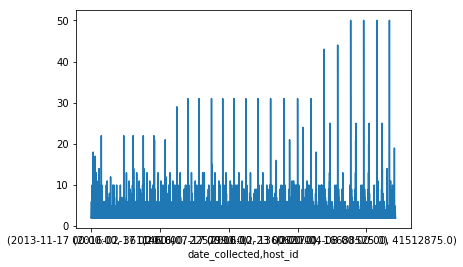

In [102]:
host_grouped[host_grouped['bin'] == '2+']['home_count'].plot()

In [103]:
host_grouped.head()

home_count bin
date_collected host_id                 
2013-11-17     22402.0            1   1
               25831.0            1   1
               149208.0           1   1
               305675.0           1   1
               321702.0           1   1

In [104]:
host_grouped.mean()

home_count    1.274696
dtype: float64

In [121]:
host_binned = host_grouped.groupby([host_grouped.index.get_level_values(0),'bin']).sum().unstack()
#Sorting correctly
host_binned = host_binned.loc[host_binned.index.sort_values()]

In [122]:
host_binned

home_count     
bin                     1   2+
date_collected                
2013-11-17            105   22
2014-05-11           2338  566
2014-08-24           2423  523
2015-02-19           2576  580
2015-08-21           2497  530
2015-10-21           2744  492
2015-11-21           3370  812
2015-12-14           3498  848
2016-01-16           3615  861
2016-02-17           4268  863
2016-03-19           4210  854
2016-04-15           4097  614
2016-05-19           4067  579
2016-06-04           4291  800
2016-06-18           3980  593
2016-07-17           4092  624
2016-08-19           4035  641
2016-09-17           4083  706
2016-10-19           4157  712
2016-11-21           4286  668
2016-12-23           4577  751
2017-01-14           4457  662
2017-02-16           4327  629
2017-03-12           4297  610
2017-03-24           4291  627
2017-04-08           4278  635
2017-05-05           4301  619
2017-07-10           4369  631

In [123]:
#creating percentage version of host_binned
#host_binned.iloc[:,0]

host_binned_prop = pd.concat([(host_binned.iloc[:,0] / host_binned.sum(axis=1)),
           (host_binned.iloc[:,1] / host_binned.sum(axis=1))],axis=1, names = ['blah','bah']).round(2)
#Setting column names
host_binned_prop.columns = ['1','2+']

In [124]:
host_binned_prop

,1,2+
date_collected,,
2013-11-17,0.83,0.17
2014-05-11,0.81,0.19
2014-08-24,0.82,0.18
2015-02-19,0.82,0.18
2015-08-21,0.82,0.18
2015-10-21,0.85,0.15
2015-11-21,0.81,0.19
2015-12-14,0.80,0.20
2016-01-16,0.81,0.19


In [28]:
host_binned_prop.to_csv('proportions.csv')

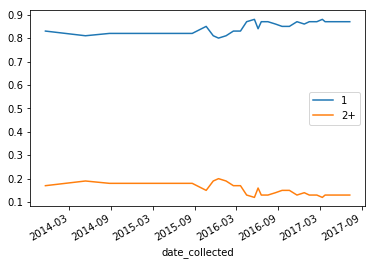

In [29]:
host_binned_prop.plot()

In [66]:
#Checking grouped by year
year_grouped = df[df['room_type'] == 'Entire home/apt'].\
groupby(['year','host_id'])['room_id'].nunique().to_frame().rename(columns={'room_id':'home_count'})

In [67]:
year_grouped['bin'] = pd.cut(x = year_grouped['home_count'], bins =[0,1,1000], labels = ['1','2+'])

In [68]:
year_grouped.groupby('bin').sum()

,home_count
bin,
1,21323
2+,5446


In [69]:
year_binned = year_grouped.groupby([year_grouped.index.get_level_values(0),'bin']).sum().unstack()
#Sorting correctly
year_binned = year_binned.loc[year_binned.index.sort_values()]

In [70]:
#creating percentage version of year_binned
#year_binned.iloc[:,0]

year_binned_prop = pd.concat([(year_binned.iloc[:,0] / year_binned.sum(axis=1)),
           (year_binned.iloc[:,1] / year_binned.sum(axis=1))],axis=1, names = ['blah','bah']).round(2)
#Setting column names
year_binned_prop.columns = ['1','2+']

In [71]:
year_binned_prop

,1,2+
year,,
2013,0.83,0.17
2014,0.80,0.20
2015,0.79,0.21
2016,0.77,0.23
2017,0.84,0.16


In [162]:
df.ix[df['room_id'].unique().index]

/Users/ggaasemyr/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [166]:
df['room_id'].unique()

array([    8014,    10832,    26488, ..., 18686484, 19610265, 15481646])

In [72]:
tmp_multi = 955 + 253 + 70 +248
tmp_sum = 3272 + tmp_multi

tmp_multi / tmp_sum

0.3180491871613172

I grouped by year to compare against Tableau. I can now exclude this as the reason for the incorrect numbers in Tableau.